## 선형모델(L1, L2 규제)


## 분류


In [97]:
import mglearn
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB

# 선형 분류


In [98]:
cancer = load_breast_cancer()
X, y = cancer["data"], cancer["target"]
print(X.shape, y.shape)

(569, 30) (569,)


In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [105]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [108]:
y_pred = gnb.predict(X_test)
# 정확도(Accuracy)를 계산하는 두 가지 방식
# score()는 좀더 간편하고, np.mean()은 좀 더 명시적
print(gnb.score(X_test, y_test))
print(np.mean(y_test == y_pred))

0.9736842105263158
0.9736842105263158


In [ ]:
# 1. StandardScaler 객체 생성
# StandardScaler는 각 feature(열)의 값을 평균이 0, 표준편차가 1이 되도록 정규화해 줍니다.
scaler = StandardScaler()

# 2. fit_transform() 메서드로 정규화 수행
# - fit(): 데이터를 분석해서 평균과 표준편차를 계산함
# - transform(): 계산된 평균과 표준편차를 이용해 데이터를 표준화함
# 결과적으로 X_scaled에는 정규화된 데이터가 저장됩니다.
X_scaled = scaler.fit_transform(X)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [95]:
# LogisticRegression -> c를 이용해서 규제 강도를 결정
# 예시: 규제 강도 실험용 C 값 (0.01: 강한 규제, 1.0: 기본, 100.0: 약한 규제)
# 작은 것 < 1.0 < 큰 것
# 강한 규제 < 일반 규제 < 규제를 해제
lr = LogisticRegression(max_iter=5000)  # c를 결정하세요
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [94]:
y_pred = lr.predict(X_test)
print(lr.score(X_test, y_test))

0.9649122807017544


In [81]:
# L2는 일반화 성능에 관심이 있으면 L2를 선택하는 경향이 있음
# L1은 주요한 특성을 스스로 고려하는 모델의 경우 => 모델을 해석하는데 용이함

models = {
    "OLS": LogisticRegression(penalty=None, max_iter=5000),
    "Ridge(L2)": LogisticRegression(penalty="l2", solver="lbfgs", max_iter=5000),
    "Lasso(L1)": LogisticRegression(penalty="l1", solver="liblinear", max_iter=5000),
}

In [82]:
result = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_prob)
    result[name] = auc

In [83]:
result

{'OLS': np.float64(0.9823124795283328),
 'Ridge(L2)': np.float64(0.99737962659679),
 'Lasso(L1)': np.float64(0.9963969865705864)}

In [4]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [5]:
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))  # 학습 데이터
print(np.mean(y_pred == y_test))  # 예측 데이터

0.9590643274853801
0.9590643274853801


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 1420, in _execute

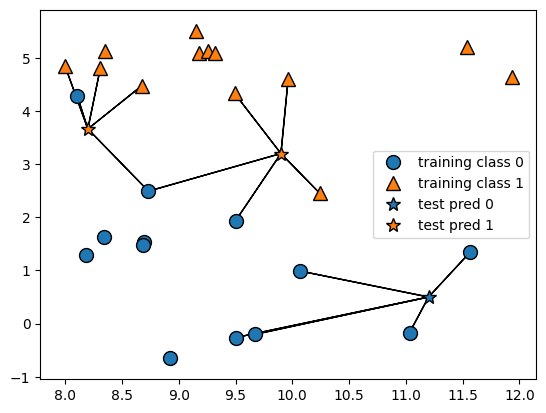

In [6]:
# 일반적으로 3 또는 5
mglearn.plots.plot_knn_classification(n_neighbors=5)

## 회귀


In [45]:
housing = fetch_california_housing()
X, y = housing["data"], housing["target"]
# 데이터 shape을 체크하라
print(X.shape, y.shape)
df = pd.DataFrame(X, columns=housing["feature_names"])
df.head()

(20640, 8) (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [54]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [53]:
from sklearn.metrics import mean_squared_error

y_pred = knn.predict(X_test)
print(mean_squared_error(y_test, y_pred))

1.136942049088978


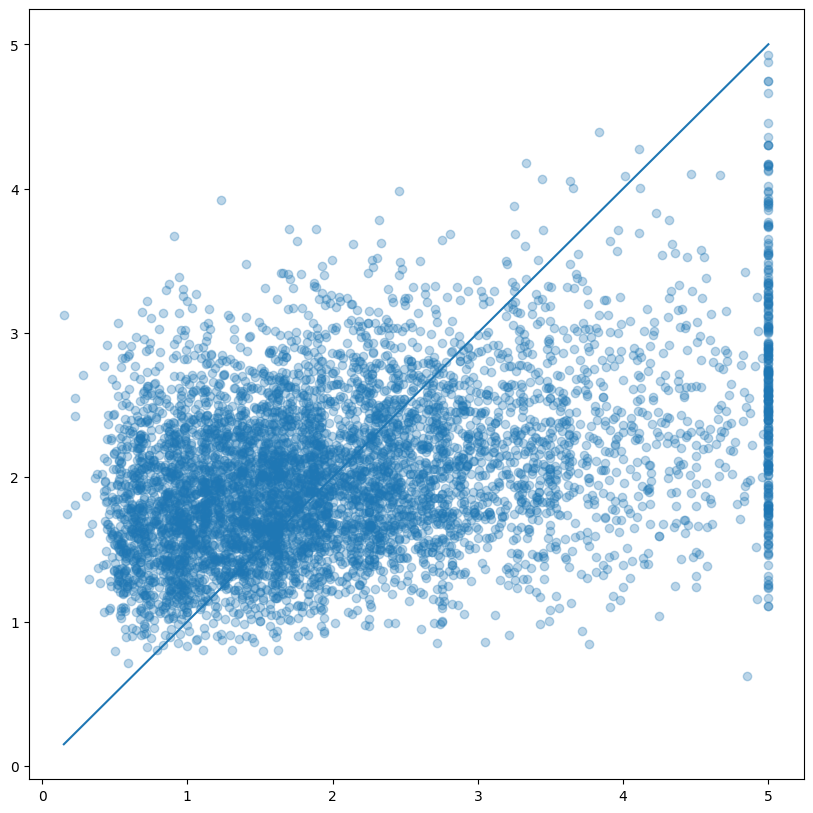

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.gray()
plt.show()

# 나이브 베이즈

- 조건부 확률을 통해 값을 예측
- 예측이 굉장히 빠름(학습이 빠르다고 하지 않았음)
- 파라미터에 비교적 둔감
- "고차원 희소 데이터에 잘 작동"
- 단점 : 선형 모델보다 "항상" 낮은 성능
